# <center>Estado de las rampas de CABA en el año 2016 </center>

## En este ejemplo veremos como podemos mostrar información geográfica mediante el uso de python en conjunto con las librerias especificas para el manejo de dicha información.

### Las librerías de python que utilizaremos son las siguientes:
   * pandas: __[pandas.org](https://pandas.pydata.org/)__
   
> Pandas es una herramienta de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar, construido sobre el lenguaje de programación Python.
   * geopandas: __[geopandas.org](https://geopandas.org/en/stable/)__
> GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas son realizadas por shapely. Geopandas depende además de fiona para el acceso a los archivos y de matplotlib para el trazado.
   * matplotlib: __[matplotlib.org](https://matplotlib.org/)__
> Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python. Matplotlib hace que las cosas fáciles sean fáciles y las difíciles sean posibles.
   * os.path: __[documentación](https://docs.python.org/es/3.10/library/os.path.html#module-os.path)__
> Este módulo implementa algunas funciones útiles en los nombres de ruta.

### Los datasets a utilizar son los siguientes:
   * Archivo shape con la informacion geográfica de las comunas de CABA __[descarga shapefile](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas-zip.zip)__
   * Rampas de accesibilidad - Relevamiento 2016 (CABA)  __[descarga csv](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-espacio-publico-e-higiene-urbana/rampas-de-accesibilidad/rampas-de-accesibilidad-relevamiento-2016.csv)__

***

**En el siguiente bloque importamos las librerías necesarias.**

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os.path

**Definimos los datasets y el path a utilizar.**

In [22]:
dir_datasets = "datasets"
comunas_caba_shp = "comunas.shp"
rampas_relevamiento_2016 = "rampas-de-accesibilidad-relevamiento-2016.csv"

path_datasets = os.path.join(os.getcwd(), dir_datasets)

<br>

<a id="gdf"></a>
**Leemos la información del shape de las comunas de CABA utilizando el metodo __[read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas-read-file)__ de geopandas asignandolo a la variable comunas generando lo que se conoce como un __[GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas-geodataframe)__.**
<div class="alert alert-block alert-success">
    <i><b>GeoDataFrame:</b> Es un pandas.DataFrame que tiene una columna con geometría.</i>
</div>

In [23]:
comunas = gpd.read_file(os.path.join(path_datasets, comunas_caba_shp))

<br>

**Vemos parte del contenido del [GeoDataFrame](#gdf) mediante el metodo __[head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head)__.
Podemos observar las columnas que tiene detallando la columna geometry, esta columna contiene la información geográfica de cada una de las comunas como tipo de geometría __[polígono](https://shapely.readthedocs.io/en/stable/manual.html?highlight=polygon#polygons)__.**

In [24]:
comunas.head()

ID          OBJETO  COMUNAS  \
0   1  LIMITE COMUNAL      2.0   
1   3  LIMITE COMUNAL      6.0   
2   6  LIMITE COMUNAL     10.0   
3   7  LIMITE COMUNAL     11.0   
4   8  LIMITE COMUNAL     12.0   

                                             BARRIOS     PERIMETRO  \
0                                           RECOLETA  21452.838648   
1                                          CABALLITO  10990.964471   
2  FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...  18332.037457   
3  VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL....  19987.696155   
4  COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...  17232.189372   

           AREA                                           geometry  
0  6.317265e+06  POLYGON ((-58.38000 -34.57002, -58.38002 -34.5...  
1  6.851029e+06  POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...  
2  1.265656e+07  POLYGON ((-58.48834 -34.62016, -58.48820 -34.6...  
3  1.412004e+07  POLYGON ((-58.49838 -34.59637, -58.49718 -34.5...  
4  1.557093e+07  POLYGON ((-58.50331 -34.59386, -58.50347 -34.5...

<br>

**Para poder graficar el mama, utilizamos el metodo __[plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)__ que recibe como parámetro las dimensiones finales de la imagen el color de los polígonos a utilizar y el color de los bordes de cada polígono.**

<AxesSubplot:>

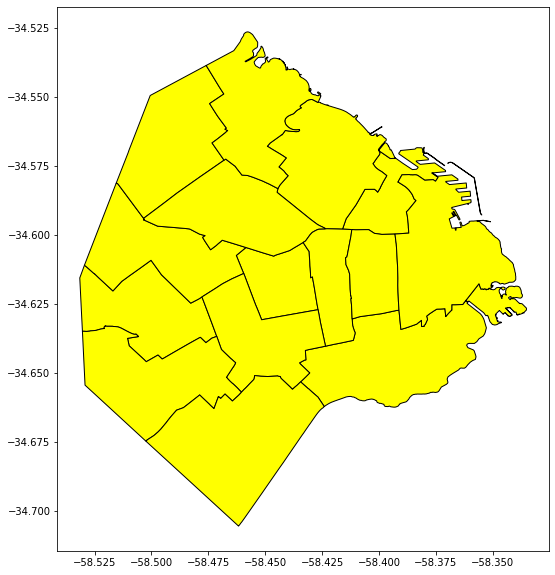

In [25]:
comunas.plot(figsize=(10,10), color='yellow',edgecolor='black')

<br>

**Como podemos observar, el mapa anterior no nos brinda el nombre de cada una de las comunas, para poder subsanar el problema debemos trabajar un poco el GeoDataFrame realizando los siguientes pasos:***
   * Crear una nueva columna de tipo __[POINT](https://shapely.readthedocs.io/en/stable/manual.html?highlight=polygon#points)__. Este dato es importante ya que es en este punto, calculado con el método __[representative_point()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.representative_point.html#geopandas-geoseries-representative-point)__, donde se va a escribir el nombre de la comuna sobre el mapa.
   * Dado que el paso anterior nos devuelve una __[GeoSerie](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas-geoseries)__ debemos quedarnos con el punto generado para cada registro del [GeoDataFrame](#gdf).
   * Por último, creamos un campo llamado nombre_comuna el cual completamos, para cada registro del [GeoDataFrame](#gdf), con la concatenación del string 'Comuna ' mas el dato contenido en la columna COMUNAS (es en esta columna donde se encuentra el número de comuna).

In [38]:
comunas['coords'] = comunas['geometry'].apply(lambda x: x.representative_point().coords[:])
comunas['coords'] = [coords[0] for coords in comunas['coords']]
comunas['nombre_comuna'] = comunas.apply(lambda x: 'Comuna ' + str(int(x['COMUNAS'])), axis=1)

<br>

**Ahora podemos volver a dibujar el mapa esta vez trabajando un poco con la libreria matplotlib para poder informar los nombres de las comunas sobre el mismo.**

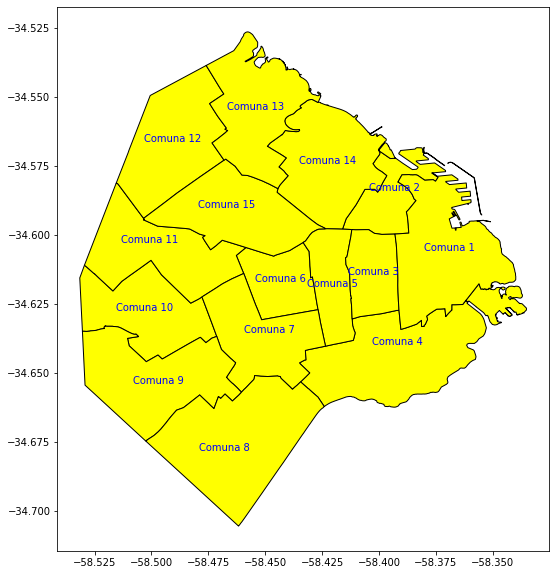

In [39]:
fig, ax = plt.subplots(figsize = (10,10))
comunas.plot(ax=ax, color='yellow', edgecolor='black')
for idx, row in comunas.iterrows():   
    plt.annotate(text=row['nombre_comuna'], xy=row['coords'], horizontalalignment='center', color='blue')


<br>

**Leemos el dataset de las rampas de CABA, este archivo contiene la latitud y la longitud de la ubicación en el mapa para cada una de las rampas. Su __[sistemas de refrencia de coordenadas](https://en.wikipedia.org/wiki/Spatial_reference_system)__ es el __[EPSG: 4326](https://epsg.org/crs_4326/WGS-84.html)__.
Para leer el dataset utilizamos el metodo __[read_csv()](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.read_csv.html)__ de Pandas**

In [28]:
rampas_2016 = pd.read_csv(os.path.join(path_datasets, rampas_relevamiento_2016), delimiter=';')

**Vemos parte del contenido del dataset.**

In [29]:
rampas_2016.head()

X          Y  ID     MES  SEMANA   ZONA                 CALLE  \
0 -58.401517 -34.613463   1  AGOSTO  1 AL 6  2 Y 3               ALBERTI   
1 -58.403174 -34.598833   2  AGOSTO  1 AL 6  2 Y 3            CORDOBA AV   
2 -58.394427 -34.618371   3  AGOSTO  1 AL 6  2 Y 3      INDEPENDENCIA AV   
3 -58.512667 -34.609169   4  AGOSTO  1 AL 6      4  SIMBRON Y MARCOS PAZ   
4 -58.510953 -34.609638   5  AGOSTO  1 AL 6      4    TINOGASTA Y ZURICH   

   ALTURA      ESTADO               DOM_NORMA                 DOM_GEO  
0   315.0  FINALIZADO             ALBERTI 315             315 ALBERTI  
1  2554.0  FINALIZADO        CORDOBA AV. 2554        2554 CORDOBA AV.  
2  1998.0  FINALIZADO  INDEPENDENCIA AV. 1998  1998 INDEPENDENCIA AV.  
3     NaN  FINALIZADO   SIMBRON Y PAZ, MARCOS   SIMBRON & PAZ, MARCOS  
4     NaN  FINALIZADO      TINOGASTA Y ZURICH      TINOGASTA & ZURICH

**En las siguientes lineas creamos las geometrias para cada una de las rampas contenidas en el dataset de rampas_2016. Para eso importamos de la libreria shapely.geometry las geometria POINT**

In [30]:
from shapely.geometry import Point
geometry = gpd.points_from_xy(rampas_2016['X'], rampas_2016['Y'])

**Vemos algunas de las geometrias creadas en el paso anterior.**

In [31]:
geometry[:3]

<GeometryArray>
Length: 3, dtype: geometry

**En las siguientes líneas creamos el dataframe geografico asignandole los datos del dataframe de rampas_2016 y las geometrias creadas anteriormente.**

In [32]:
rampas_2016_gdf = gpd.GeoDataFrame(rampas_2016,
                                  crs='epsg:4326',
                                  geometry=geometry)
rampas_2016_gdf.head()

X          Y  ID     MES  SEMANA   ZONA                 CALLE  \
0 -58.401517 -34.613463   1  AGOSTO  1 AL 6  2 Y 3               ALBERTI   
1 -58.403174 -34.598833   2  AGOSTO  1 AL 6  2 Y 3            CORDOBA AV   
2 -58.394427 -34.618371   3  AGOSTO  1 AL 6  2 Y 3      INDEPENDENCIA AV   
3 -58.512667 -34.609169   4  AGOSTO  1 AL 6      4  SIMBRON Y MARCOS PAZ   
4 -58.510953 -34.609638   5  AGOSTO  1 AL 6      4    TINOGASTA Y ZURICH   

   ALTURA      ESTADO               DOM_NORMA                 DOM_GEO  \
0   315.0  FINALIZADO             ALBERTI 315             315 ALBERTI   
1  2554.0  FINALIZADO        CORDOBA AV. 2554        2554 CORDOBA AV.   
2  1998.0  FINALIZADO  INDEPENDENCIA AV. 1998  1998 INDEPENDENCIA AV.   
3     NaN  FINALIZADO   SIMBRON Y PAZ, MARCOS   SIMBRON & PAZ, MARCOS   
4     NaN  FINALIZADO      TINOGASTA Y ZURICH      TINOGASTA & ZURICH   

                      geometry  
0  POINT (-58.40152 -34.61346)  
1  POINT (-58.40317 -34.59883)  
2  POINT (-58.39443 -34.61837)  
3  POINT (-58.51267 -34.60917)  
4  POINT (-58.51095 -34.60964)

**Nos fijamos que estados tienen las rampas y vemos que son FINALIZADO o EN EJECUCIÓN, esto nos servirá para poder representar en el mapa los puntos donde existe una rampa y diferenciarlos por su estado.**

In [33]:
rampas_2016_gdf['ESTADO'].unique()

array(['FINALIZADO', 'EN EJECUCIÓN'], dtype=object)

**Generamos el mapa con las marcas correspondientes segun el estado.

**

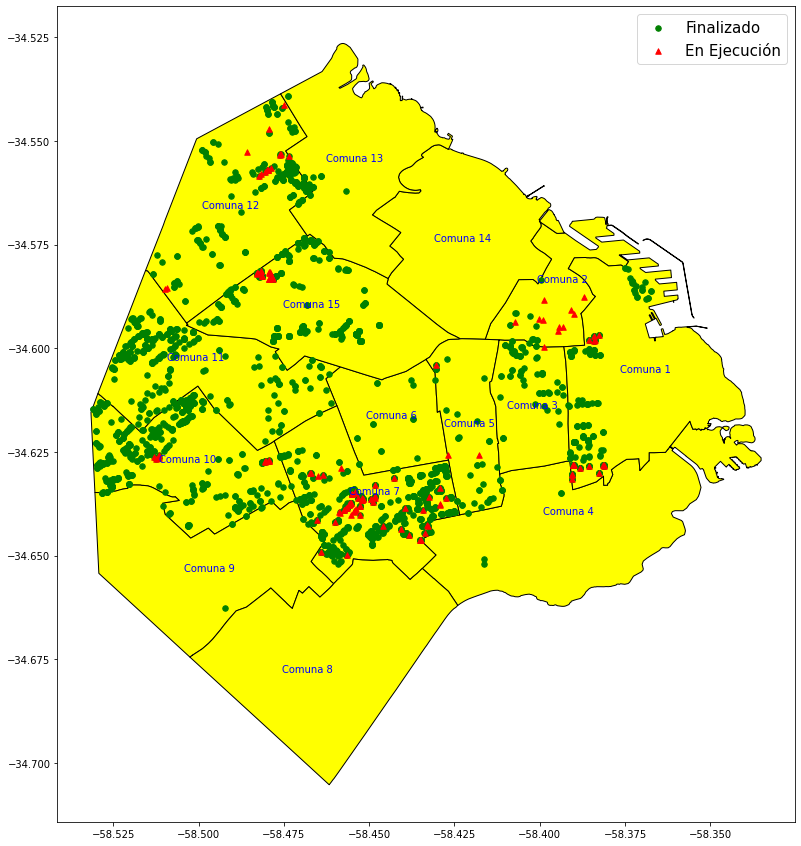

In [40]:
fig, ax = plt.subplots(figsize = (15,15))
comunas.plot(ax = ax, color='yellow', edgecolor='black')
for idx, row in comunas.iterrows():   
    plt.annotate(text=row['nombre_comuna'], xy=row['coords'], horizontalalignment='center', color='blue')
rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='FINALIZADO'].plot(ax=ax, markersize=30, color='green', marker='o', label='Finalizado')
rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='EN EJECUCIÓN'].plot(ax=ax, markersize=30, color='red', marker='^', label='En Ejecución')
plt.legend(prop={'size': 15})
